In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [71]:
#Question 1
#part a -- Forward Euler

#define delta t values
del_t = [2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7, 2e-8]
   

#given ODE
f = lambda t, y: -3 * y * np.sin(t)

#given solution
y_true = lambda t, y: (np.pi / np.sqrt(2)) * np.exp(-3 * (np.cos(t)))

#given initial condition
y_0 = np.pi / np.sqrt(2)

#set up loop over time steps
A2 = np.array([])
for i in del_t:
    dt = i
    t = np.arange(0, 5 + dt, dt)
    y = np.zeros(len(t))
    y[0] = (np.pi)/np.sqrt(2)
    
    #implement FE and calculate error
    for n in range(0, len(t) - 1):
        y[0] = y_0
        y[n + 1] = y[n] + dt * f(t[n], y[n])
    E = abs(y_true(t[5], y[5]) - f(t[5], y[5]))
    print('time step: ' + str(i))
    print(E)    
    A2 = np.append(A2,E)
    print('')
    if i == 2e-8:
        print('end of the road!')
        A1 = E
        print('A1 = ' + str(A1))
        print('A2 = ' + str(A2))
        
    # break

time step: 0.02
0.769646308863602

time step: 0.002
0.17724978595140206

time step: 0.0002
0.11726353949428425

time step: 2e-05
0.11126549238685512

time step: 2e-06
0.11066570155690653

time step: 2e-07
0.11060572262082653

time step: 2e-08
0.1105997247286958

end of the road!
A1 = 0.1105997247286958
A2 = [0.76964631 0.17724979 0.11726354 0.11126549 0.1106657  0.11060572
 0.11059972]


[ 0.1057992  -0.70328317]


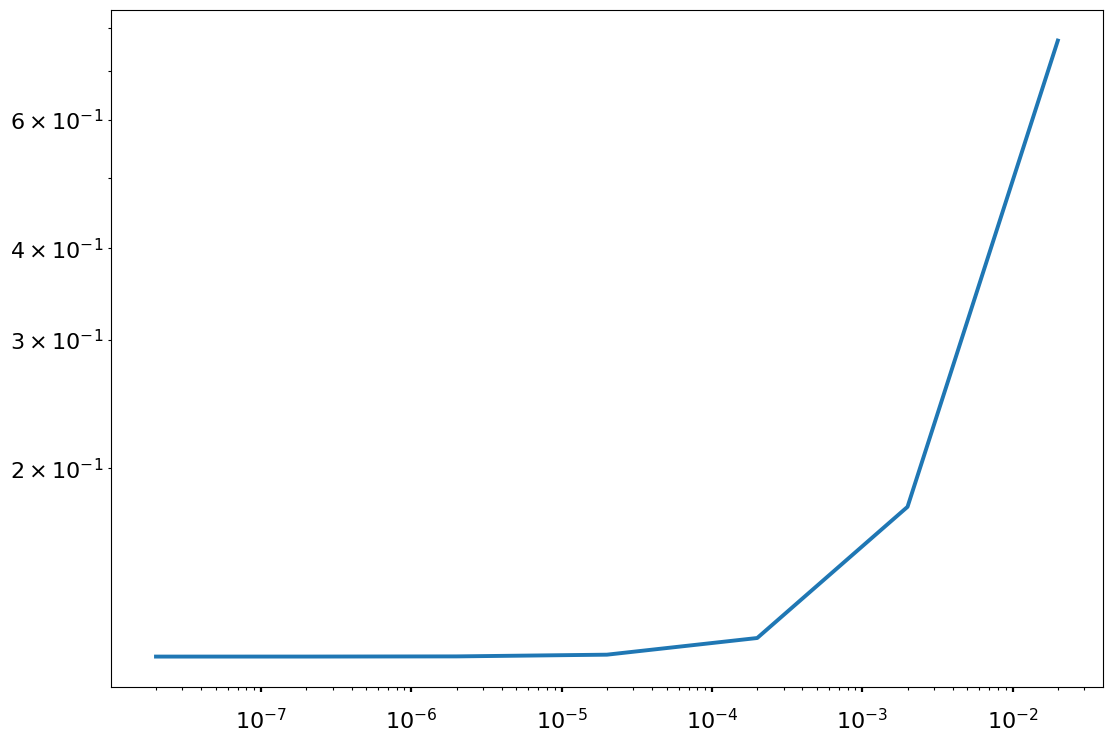

In [78]:
# plt.loglog(del_t, A2)
# plt.ylim(.01,10)
plt.loglog((del_t), (A2))
# plt.xscale('log')
# plt.yscale('log')
r = np.polyfit(np.log(del_t), np.log(A2), 1)
print(r)

In [69]:
#Question 1
#part b -- Heuns

#set up loop over time steps
for i in del_t:
    dt = i
    t = np.arange(0, 5 + dt, dt)
    y = np.zeros(len(t))
    y[0] = (np.pi)/np.sqrt(2)
    
    #implement FE and calculate error
    for n in range(0, len(t) - 1):
        y[0] = y_0
        y[n + 1] = y[n] + (dt/2) * (f(t[n],y[n] + f(t[n+1],y[n] + dt*f(t[n],y[n]))))
    E = abs(y_true(t[5], y[5]) - f(t[5], y[5]))
    print('time step: ' + str(i))
    print(E)    
    print('')
    if i == 2e-8:
        print('end of the road!')
        A2 = E
        print(A2)
    # break

time step: 0.02
0.7745595068960297

time step: 0.002
0.17725388015600257

time step: 0.0002
0.11726354350247205

time step: 2e-05
0.11126549239085468

time step: 2e-06
0.11066570155691054

time step: 2e-07
0.11060572262082653

time step: 2e-08
0.1105997247286958

end of the road!
0.1105997247286958


In [79]:
#Question 1
#part c -- Adams predictor-corrector

#set up loop over time steps
for i in del_t:
    dt = i
    t = np.arange(0, 5 + dt, dt)
    y = np.zeros(len(t))
    y_predicted = np.zeros(len(t))
    y[0] = (np.pi)/np.sqrt(2)
    
    #implement FE and calculate error
    for n in range(0, len(t) - 1):
        y[0] = y_0
        
        y[1] = y[0] + dt * f(t[0] + dt/2, y[0] + dt/2*f(t[0],y[0]))
        
        y_predicted[n + 1] = y[n] + (dt/2) * (3 * f(t[n], y[n]) - f(t[n-1], y[n-1]))
        y[n+1] = y[n] + (dt/2) * (f(t[n+1], y_predicted[n+1]) + f(t[n],y[n]))
        
        
    E = abs(y_true(t[5], y[5]) - f(t[5], y[5]))
    print('time step: ' + str(i))
    print(E)    
    print('')
    # break

time step: 0.02
0.767697286896958

time step: 0.002
0.17724778716191636

time step: 0.0002
0.117263537494992

time step: 2e-05
0.11126549238485582

time step: 2e-06
0.11066570155690453

time step: 2e-07
0.11060572262082653

time step: 2e-08
0.1105997247286958



/tmp/ipykernel_14056/3298521785.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


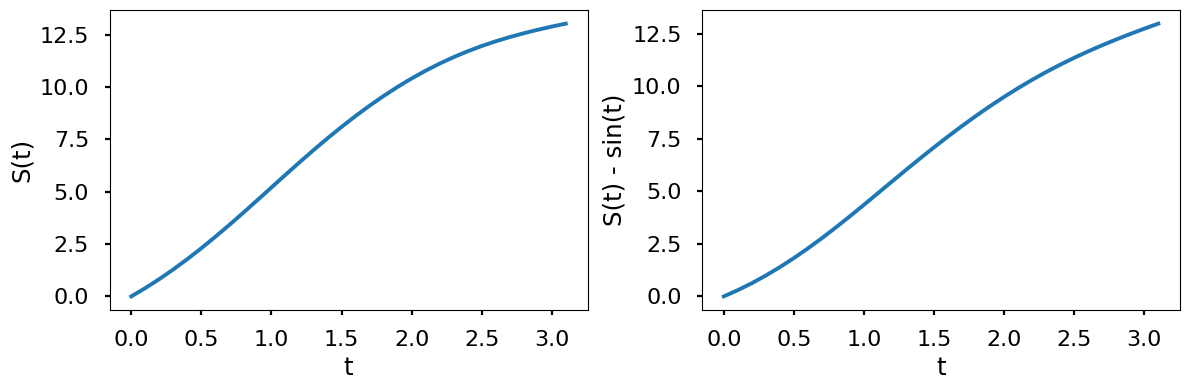